# Analysing COVID-19 Data


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import math

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [3]:
raw = pd.read_csv("COVID-19 Cases.csv")
#raw.head()

C:\Users\RAR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
covid = raw.copy()
covid.head()

Case_Type  People_Total_Tested_Count  Cases  Difference       Date  \
0  Confirmed                        NaN      0           0   2/3/2020   
1     Deaths                        NaN      0           0   3/1/2020   
2  Confirmed                        NaN     23           0  4/21/2020   
3     Deaths                        NaN      0           0  2/11/2020   
4  Confirmed                        NaN      0           0   2/6/2020   

          Combined_Key       Country_Region Province_State Admin2 iso2 iso3  \
0          Switzerland          Switzerland            NaN    NaN   CH  CHE   
1               Cyprus               Cyprus            NaN    NaN   CY  CYP   
2  Antigua and Barbuda  Antigua and Barbuda            NaN    NaN   AG  ATG   
3              Jamaica              Jamaica            NaN    NaN   JM  JAM   
4               Belize               Belize            NaN    NaN   BZ  BLZ   

   FIPS      Lat     Long  Population_Count  \
0   NaN  46.8182   8.2275         8654618.0   
1   NaN  35.1264  33.4299         1207361.0   
2   NaN  17.0608 -61.7964           97928.0   
3   NaN  18.1096 -77.2975         2961161.0   
4   NaN  17.1899 -88.4976          397621.0   

   People_Hospitalized_Cumulative_Count  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

                                         Data_Source     Prep_Flow_Runtime  
0  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  5/2/2020 11:35:41 PM  
1  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  5/2/2020 11:35:41 PM  
2  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  5/2/2020 11:35:41 PM  
3  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  5/2/2020 11:35:41 PM  
4  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...  5/2/2020 11:35:41 PM

In [26]:
covid.isna().sum()

Case_Type                                    0
People_Total_Tested_Count               715728
Cases                                        0
Difference                                   0
Date                                         0
Combined_Key                                 0
Country_Region                               0
Province_State                           37128
Admin2                                   54264
iso2                                       408
iso3                                       204
FIPS                                     76092
Lat                                      21420
Long                                     21420
Population_Count                         21420
People_Hospitalized_Cumulative_Count    715728
Data_Source                                  0
Prep_Flow_Runtime                            0
dtype: int64

In [27]:
covid.sort_values(by=['Date'],inplace=True)

In [28]:
covid['Date'] = covid['Date'].astype('datetime64')

In [29]:
covid.dtypes

Case_Type                                       object
People_Total_Tested_Count                      float64
Cases                                            int64
Difference                                       int64
Date                                    datetime64[ns]
Combined_Key                                    object
Country_Region                                  object
Province_State                                  object
Admin2                                          object
iso2                                            object
iso3                                            object
FIPS                                           float64
Lat                                            float64
Long                                           float64
Population_Count                               float64
People_Hospitalized_Cumulative_Count           float64
Data_Source                                     object
Prep_Flow_Runtime                               object
dtype: obj

In [30]:
covid.set_index('Date',inplace = True)

## Analysis on when the cases increased drastically

### 1. Analyse the difference column and group date by week

In [12]:
covid.columns

Index(['Case_Type', 'People_Total_Tested_Count', 'Cases', 'Difference', 'Date',
       'Combined_Key', 'Country_Region', 'Province_State', 'Admin2', 'iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'],
      dtype='object')

In [13]:
covid.drop(['People_Total_Tested_Count','Combined_Key','Admin2','iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'], axis = 1, inplace = True) 

In [42]:
covidUS = covid.loc[(covid['Case_Type'] == 'Confirmed') &(covid['Country_Region'] == 'US') & (covid['Cases'] > 0),covid.columns.isin(['Cases', 'Difference', 'Date'])]
covidUS.head()
#covidUS_grp = covidUS.groupby(by = covidUS['Date'].dt.week).agg({np.sum})
#covidUS_grp
#covidUS = covidUS.to_period(freq='w')

Cases  Difference
Date                         
2020-01-22      1           1
2020-01-23      1           0
2020-01-24      1           0
2020-01-24      1           1
2020-01-25      1           0

In [41]:
#covidUS_grp = covidUS.groupby(by = covidUS['Date'].to_period(freq='w')).agg({np.sum})

In [52]:
covidUS_grp = covidUS.resample('W',convention='end').sum()#.agg({np.sum})

In [53]:
covidUS_grp

Cases  Difference
Date                           
2020-01-26       11           5
2020-02-02       43           3
2020-02-09       77           3
2020-02-16       87           2
2020-02-23       97           2
2020-03-01      131          15
2020-03-08     1405         420
2020-03-15    11806        2615
2020-03-22   111684       31312
2020-03-29   610355      108332
2020-04-05  1726622      196136
2020-04-12  3232052      218655
2020-04-19  4673208      199583
2020-04-26  6099258      211465
2020-05-03  6345200      166943

### 2. Collect top 10 countries, China(to know how long it to increase in cases drastically), and check india data

In [55]:
AllCoun = covid.loc[:,covid.columns.isin(['Date','Difference','Country_Region'])]
AllCoun.head()

Difference    Country_Region
Date                                    
2020-01-22           0                US
2020-01-22           0  Papua New Guinea
2020-01-22           0                US
2020-01-22           0                US
2020-01-22           0                US

In [57]:
#To find to 20 countries
#grp = AllCoun.sort_values(by='Difference',ascending=False)
#grp_top = grp.groupby(by=['Date','Country_Region']).Difference.agg({np.sum})

In [58]:
p = AllCoun.pivot_table(index='Date', columns='Country_Region', values='Difference', aggfunc=np.sum)
p.tail()

Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-04-28              126       16      137        1       0   
2020-04-29              113       16      206        1       0   
2020-04-30              236        8      164        2       0   
2020-05-01              168        9      151        1       3   
2020-05-02              138        7      147        3       5   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-04-28                        0        134       60         29      103   
2020-04-29                        0        165       65         10       56   
2020-04-30                        0        147      136         16       54   
2020-05-01                        1        111       83         12       84   
2020-05-02                        0        161      125         22       34   

Country_Region  ...  United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  \
Date            ...                                                            
2020-04-28      ...            4913        5          35          0        0   
2020-04-29      ...            4888        5          64          2        0   
2020-04-30      ...            6716       15          37          8        0   
2020-05-01      ...            6945        5          47         -4        0   
2020-05-02      ...            5437        4          32         10        0   

Country_Region  West Bank and Gaza  Western Sahara  Yemen  Zambia  Zimbabwe  
Date                                                                         
2020-04-28                       1               0      0       7         0  
2020-04-29                       1               0      5       2         0  
2020-04-30                       0               0      2       9         8  
2020-05-01                       9               0      1       3         0  
2020-05-02                       0               0      3      10        -6  

[5 rows x 186 columns]

In [129]:
top_20_Diff = p.loc[:,p.columns.isin(['US', 'Spain', 'Italy', 'United Kingdom', 'France', 'Germany', 'Turkey',
       'Russia', 'Brazil', 'Iran', 'China', 'Canada', 'Belgium', 'Peru',
       'Netherlands', 'India', 'Switzerland', 'Ecuador', 'Saudi Arabia',
       'Portugal'])]
top_20_Diff.head()

Country_Region  Belgium  Brazil  Canada  China  Ecuador  France  Germany  \
Date                                                                       
2020-01-22            0       0       0    565        0       0        0   
2020-01-23            0       0       0     96        0       0        0   
2020-01-24            0       0       0    285        0       2        0   
2020-01-25            0       0       0    502        0       1        0   
2020-01-26            0       0       1    683        0       0        0   

Country_Region  India  Iran  Italy  Netherlands  Peru  Portugal  Russia  \
Date                                                                      
2020-01-22          0     0      0            0     0         0       0   
2020-01-23          0     0      0            0     0         0       0   
2020-01-24          0     0      0            0     0         0       0   
2020-01-25          0     0      0            0     0         0       0   
2020-01-26          0     0      0            0     0         0       0   

Country_Region  Saudi Arabia  Spain  Switzerland  Turkey  US  United Kingdom  
Date                                                                          
2020-01-22                 0      0            0       0   1               0  
2020-01-23                 0      0            0       0   0               0  
2020-01-24                 0      0            0       0   1               0  
2020-01-25                 0      0            0       0   0               0  
2020-01-26                 0      0            0       0   3               0

In [130]:
top_20_Diff_grp = top_20_Diff.resample('W',convention='end').sum()#.agg({np.sum})

In [131]:
top_20_Diff_grp

Country_Region  Belgium  Brazil  Canada  China  Ecuador  France  Germany  \
Date                                                                       
2020-01-26            0       0       1   2131        0       3        0   
2020-02-02            0       0       3  14860        0       3       10   
2020-02-09            1       0       3  23743        0       5        4   
2020-02-16            0       0       0  31545        0       2        2   
2020-02-23            0       0       2   7188        0       0        0   
2020-03-01            1       2      15   3337        6     119      114   
2020-03-08          198      18      40   1119        8    1023      910   
2020-03-15          690     142     187    283       16    3468     4766   
2020-03-22         2586    1409    1225    503      773   12296    19161   
2020-03-29         7791    2821    4854    717     1179   26400    37661   
2020-04-05         9871    7224    9671    509     1844   36186    39079   
2020-04-12        12109   11799    8998    542     3973   56619    29169   
2020-04-19        10932   17701   12185   1964     2143   36607    18894   
2020-04-26         9049   26270   13522    108    13353   12348    13976   
2020-05-03         4054   36475   10889     47     5540    8202     8033   

Country_Region  India   Iran  Italy  Netherlands   Peru  Portugal  Russia  \
Date                                                                        
2020-01-26          0      0      0            0      0         0       0   
2020-02-02          2      0      2            0      0         0       2   
2020-02-09          1      0      1            0      0         0       0   
2020-02-16          0      0      0            0      0         0       0   
2020-02-23          0     51    155            0      0         0       0   
2020-03-01          0    981   1570           10      0         0       0   
2020-03-08         36   5728   6013          258      6        30      15   
2020-03-15         76   7902  18815          890     37       215      46   
2020-03-22        288   8661  38058         3239    325      1369     305   
2020-03-29        648  17626  43854         7305    502      4467    1174   
2020-04-05       2636  20880  36367         8022   1494      5492    3892   
2020-04-12       5849  14331  31427         8769   5348      5516   10466   
2020-04-19       8638  11169  26370         8042   8316      3831   27314   
2020-04-26      10597   8862  21687         5996  12217      3847   38482   
2020-05-03      12251   6413  13719         2906  15489      1446   43580   

Country_Region  Saudi Arabia  Spain  Switzerland  Turkey      US  \
Date                                                               
2020-01-26                 0      0            0       0       5   
2020-02-02                 0      1            0       0       3   
2020-02-09                 0      1            0       0       3   
2020-02-16                 0      0            0       0       2   
2020-02-23                 0      0            0       0       2   
2020-03-01                 0     82           27       0      16   
2020-03-08                11    606          312       0     440   
2020-03-15                92   7397         1875       6    2517   
2020-03-22               408  22453         5358    1260   31162   
2020-03-29               796  56373         7557    8082  110122   
2020-04-05              1129  57374         6686   18295  204620   
2020-04-12              2085  39753         4706   30511  232355   
2020-04-19              4938  35087         2612   30169  213922   
2020-04-26              8202  11697         1538   24612  225342   
2020-05-03              7974  10858          908   14776  178242   

Country_Region  United Kingdom  
Date                            
2020-01-26                   0  
2020-02-02                   2  
2020-02-09                   1  
2020-02-16                   6  
2020-02-23                   0  
2020-03-0

In [76]:
#top_20_Diff_grp.transpose()

In [132]:
top_20_Diff_grp = top_20_Diff_grp.loc[:,top_20_Diff_grp.columns.isin(['US', 'Spain', 'Italy', 'United Kingdom', 'China', 'Canada', 'India'])]
top_20_Diff_grp

Country_Region  Canada  China  India  Italy  Spain      US  United Kingdom
Date                                                                      
2020-01-26           1   2131      0      0      0       5               0
2020-02-02           3  14860      2      2      1       3               2
2020-02-09           3  23743      1      1      1       3               1
2020-02-16           0  31545      0      0      0       2               6
2020-02-23           2   7188      0    155      0       2               0
2020-03-01          15   3337      0   1570     82      16              27
2020-03-08          40   1119     36   6013    606     440             240
2020-03-15         187    283     76  18815   7397    2517             912
2020-03-22        1225    503    288  38058  22453   31162            4843
2020-03-29        4854    717    648  43854  56373  110122           15421
2020-04-05        9671    509   2636  36367  57374  204620           32858
2020-04-12        8998    542   5849  31427  39753  232355           43198
2020-04-19       12185   1964   8638  26370  35087  213922           42191
2020-04-26       13522    108  10597  21687  11697  225342           38455
2020-05-03       10889     47  12251  13719  10858  178242           33551

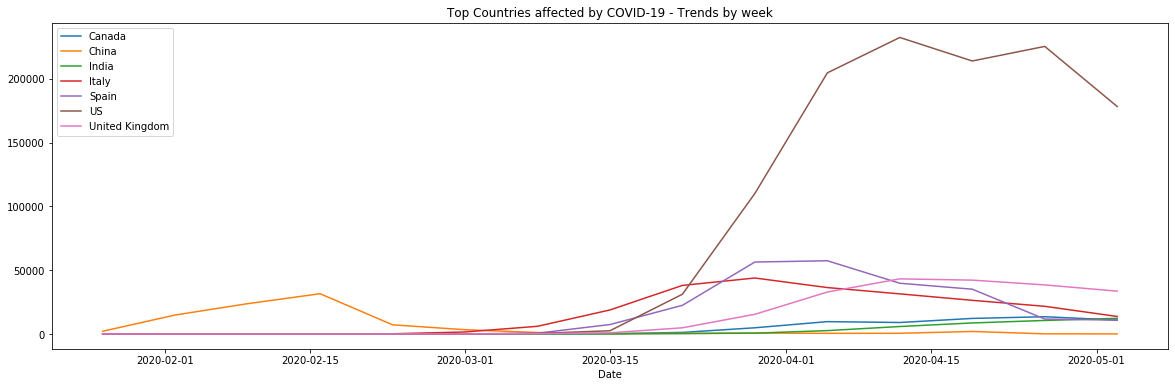

In [168]:
plt.figure(figsize = (20,6))
#add a title
plt.title("Top Countries affected by COVID-19 - Trends by week")
plt.xlabel('Week')
sns.lineplot(data = top_20_Diff_grp,dashes=False)
plt.show()

## Conclusion:

#### The number of cases drastically increased on 2020-03-15 from hundreds to thousands
#### On 2020-03-15, china's number of new cases dropped gradually
#### India has started increasing in number of new cases gradually and still in control when comparing to the top contries which were most affected by COVID-19

In [163]:
#top = top_20_Diff_grp.copy()

In [164]:
#top['Week'] = range(1,len(top.index)+1)
#top['Week'] = list('Week '+str(x) for x in top['Week'])

In [166]:
#top

In [161]:
#top.set_index('Week')

In [167]:
"""plt.figure(figsize = (16,6))
#add a title
plt.title("Top Countries affected by COVID-19 - Trends by week")
plt.xlabel('Week')
sns.lineplot(data = top,dashes=False)
plt.show()"""

'plt.figure(figsize = (16,6))\n#add a title\nplt.title("Top Countries affected by COVID-19 - Trends by week")\nplt.xlabel(\'Week\')\nsns.lineplot(data = top,dashes=False)\nplt.show()'